# Salary Prediction Dataset

https://www.kaggle.com/datasets/hekkta/salary-predictor



In [3]:
# -- Import libraries -- #

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import KFold
%matplotlib inline
import pickle 

In [4]:
#Open

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [5]:
# -- Reading Dataset --#

data2=pd.read_csv("../data/clean/salary_cleaned.csv")

In [6]:
# -- Showing DataSet -- #

data2

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,16,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,2,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,11,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,16,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,15,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,13,3,12,2,7,8,4,5,1,1,...,5,5,5,3,1,5,1,5,2,4583.333333
1998,2,3,16,1,12,4,3,3,1,3,...,4,4,4,2,3,4,1,1,2,5858.333333
1999,16,1,18,2,13,4,4,1,2,2,...,4,4,4,3,2,5,1,2,2,11000.000000
2000,12,4,12,2,7,4,5,1,2,1,...,5,2,5,4,1,5,1,1,2,693.333333


In [7]:
X = data2.drop(['monthly_salary','industry'], axis=1)
y = data2['monthly_salary']

# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train_scaled = scaler.transform(transformer.transform(X_train))
X_test_scaled = scaler.transform(transformer.transform(X_test))

In [16]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=2)

# Train the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test_scaled)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the coefficient of determination (R-squared) for the training set
y_pred_train = gb_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)
print("R2 of the training set:", r2_train)

# Calculate the coefficient of determination (R-squared) for the testing set
y_pred_test = gb_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print("R2 of the testing set:", r2_test)



MAE: 2037.3795779383627
MSE: 18626197.800277404
R2 of the training set: 0.8619893301761223
R2 of the testing set: 0.24702109722700982


In [19]:
parameters_knn = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}


# Initialize the K-Nearest Neighbors model
knn = KNeighborsRegressor()

# Perform grid search
grid_search = GridSearchCV(knn, parameters_knn, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the model with the best parameters
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_knn.predict(X_test_scaled)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the coefficient of determination (R-squared) for the training set
y_pred_train = best_knn.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)
print("R2 of the training set:", r2_train)

# Calculate the coefficient of determination (R-squared) for the testing set
y_pred_test = best_knn.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print("R2 of the testing set:", r2_test)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
MAE: 2051.2290064336644
MSE: 19524564.478351023
R2 of the training set: 0.3161076559215784
R2 of the testing set: 0.2107039077073316


In [17]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test_scaled)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the coefficient of determination (R-squared) for the training set
y_pred_train = rf_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_pred_train)
print("R2 of the training set:", r2_train)

# Calculate the coefficient of determination (R-squared) for the testing set
y_pred_test = rf_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
print("R2 of the testing set:", r2_test)

MAE: 1915.4224196268706
MSE: 18301239.398532312
R2 of the training set: 0.8846185697223491
R2 of the testing set: 0.26015779981207743


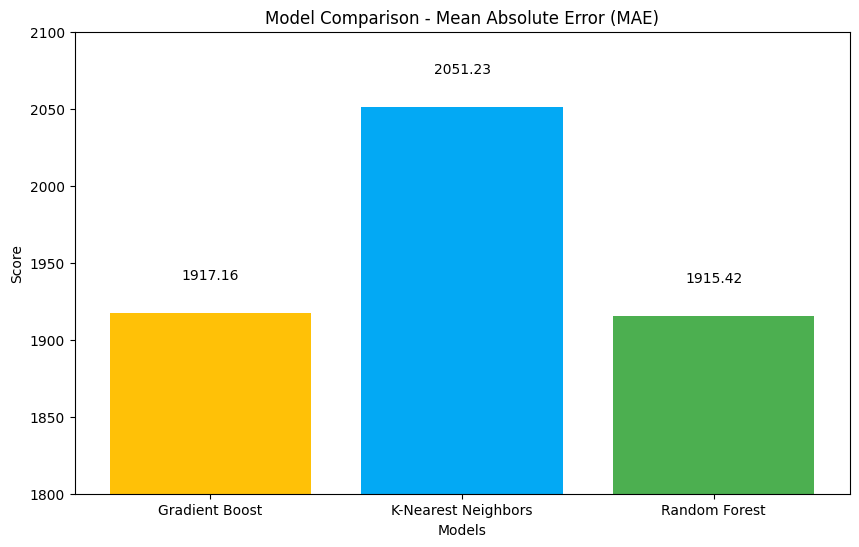

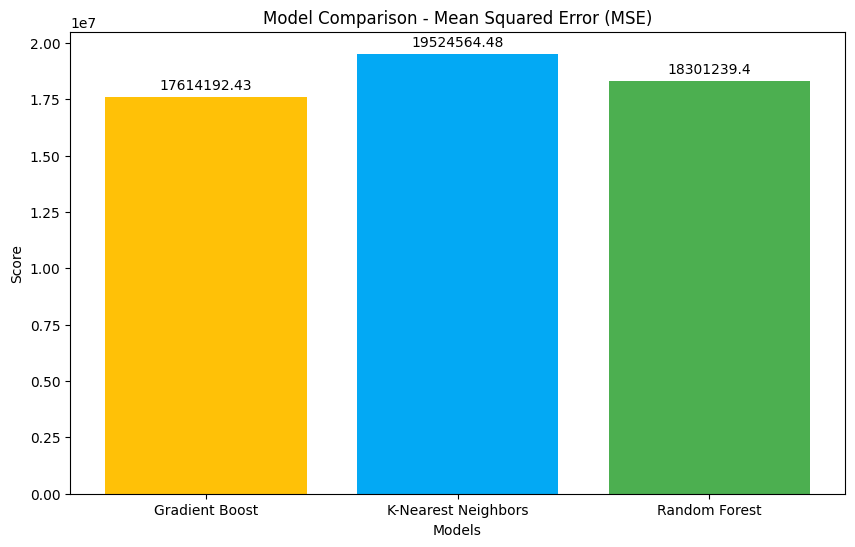

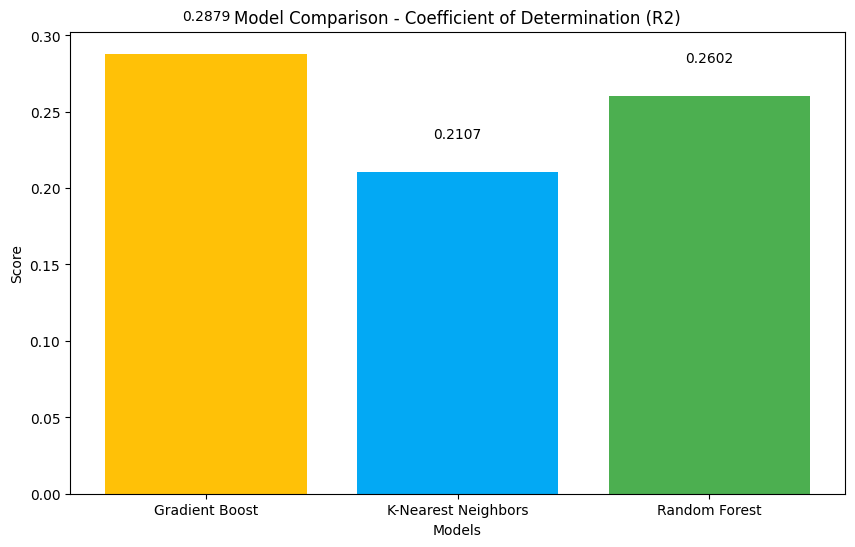

In [12]:
# Define the model names and corresponding scores
models = ['Gradient Boost', 'K-Nearest Neighbors', 'Random Forest']
mae_scores = [1917.16, 2051.23, 1915.42]
mse_scores = [17614192.43, 19524564.48, 18301239.40]
r2_scores = [0.2879, 0.2107, 0.2602]

# Set the bar colors
colors = ['#FFC107', '#03A9F4', '#4CAF50']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Mean Absolute Error (MAE)')
plt.ylim(1800, 2100)  # Adjust the y-axis limits for better visualization

# Add data labels to the bars
for i, score in enumerate(mae_scores):
    plt.text(i, score + 20, str(score), ha='center', va='bottom')

# Save the image 
plt.savefig("../Images/Model Comparison MAE.png", dpi=300)


# Display the plot
plt.show()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Mean Squared Error (MSE)')

# Add data labels to the bars
for i, score in enumerate(mse_scores):
    plt.text(i, score + 200000, str(round(score, 2)), ha='center', va='bottom')

# Save the image 
plt.savefig("../Images/Model Comparison MSE.png", dpi=300)

# Display the plot
plt.show()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Coefficient of Determination (R2)')

# Add data labels to the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.02, str(round(score, 4)), ha='center', va='bottom')

# Save the image 
plt.savefig("../Images/Model Comparison R2.png", dpi=300)

# Display the plot
plt.show()
